# Experiment 1

1. We extract 4 and 9 from MNIST data.

In [ ]:
import tensorflow as tf
import numpy as np

# Load the dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Create a binary classification task with class imbalance
train_idx = np.where((y_train == 4) | (y_train == 9))[0]
test_idx = np.where((y_test == 4) | (y_test == 9))[0]
x_train, y_train = x_train[train_idx], y_train[train_idx]
x_test, y_test = x_test[test_idx], y_test[test_idx]

In [ ]:
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (11791, 28, 28, 1)
11791 train samples
1991 test samples


In [ ]:
print(x_train[y_train==4,].shape[0], "train samples of 4")
print(x_train[y_train==9,].shape[0], "train samples of 9")
print(x_test[y_test==4,].shape[0], "test samples of 4")
print(x_test[y_test==9,].shape[0], "test samples of 9")

5842 train samples of 4
5949 train samples of 9
982 test samples of 4
1009 test samples of 9


2. Write function to generate imbalance data.

In [ ]:
def get_imbalance_dataset(mnist,
                          pos_ratio=0.9,
                          ntrain=5000,
                          nval=10,
                          ntest=500,
                          seed=0,
                          class_0=4,
                          class_1=9):
    rnd = np.random.RandomState(seed)

    # In training, we have 10% 4 and 90% 9.
    # In testing, we have 50% 4 and 50% 9.
    ratio = 1 - pos_ratio
    ratio_test = 0.5

    (x_train, y_train),(x_test, y_test) = mnist.load_data()

    # Normalize the data
    x_train, x_test = x_train / 255.0, x_test / 255.0
    x_train = np.expand_dims(x_train, axis=-1)
    x_test = np.expand_dims(x_test, axis=-1)
    
    # Create a binary classification task with class imbalance
    train_idx_0 = np.where((y_train == 4))[0]
    train_idx_1 = np.where((y_train == 9))[0]
    test_idx_0 = np.where((y_test == 4))[0]
    test_idx_1 = np.where((y_test == 9))[0]

    # calculate ntrain_class_0 and ntrain_class_1 in train set:
    ntrain_class_0 = int(np.ceil(ratio*ntrain))
    ntrain_class_1 = int(np.ceil(pos_ratio*ntrain))

    # select imbalance train data
    idx_train_0 = np.random.choice(train_idx_0, ntrain_class_0, replace=False)
    idx_train_1 = np.random.choice(train_idx_1, ntrain_class_1, replace=False)
    idx_train = np.concatenate((idx_train_0, idx_train_1))

    # calculate ntest_class_0 and ntest_class_1 in train set:
    ntest_class_0 = int(np.ceil(ratio_test*ntest))
    ntest_class_1 = int(np.ceil((1 - ratio_test)*ntest))

    # select test data
    idx_test_0 = np.random.choice(test_idx_0, ntest_class_0, replace=False)
    idx_test_1 = np.random.choice(test_idx_1, ntest_class_1, replace=False)
    idx_test = np.concatenate((idx_test_0, idx_test_1))

    # select validation data
    idx_validation_0 = np.random.choice(idx_train_0, int(np.ceil(nval * ratio_test)), replace=False)
    idx_validation_1 = np.random.choice(idx_train_1, int(np.ceil(nval * ratio_test)), replace=False)
    idx_validation = np.concatenate((idx_validation_0, idx_validation_1))

    return [(x_train[idx_train], y_train[idx_train]),(x_test[idx_test], y_test[idx_test]),(x_train[idx_validation], y_train[idx_validation])]

    

In [ ]:
(x_train, y_train),(x_test, y_test),(x_val, y_val) = get_imbalance_dataset(mnist,pos_ratio=0.98)

In [ ]:
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
x_test[y_test==4].shape

x_train shape: (5001, 28, 28, 1)
5001 train samples
500 test samples


(250, 28, 28, 1)

3. plot train data, test data and val data to see the imbalance in data

Text(0.5, 1.0, 'validation')

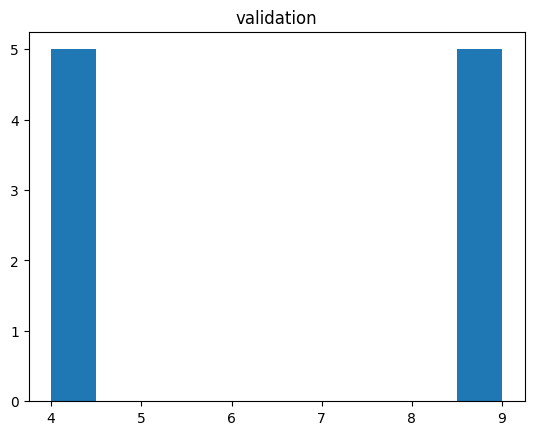

In [ ]:
from matplotlib import pyplot as plt
plt.figure()
plt.hist(y_val)
plt.title('validation')

Text(0.5, 1.0, 'train')

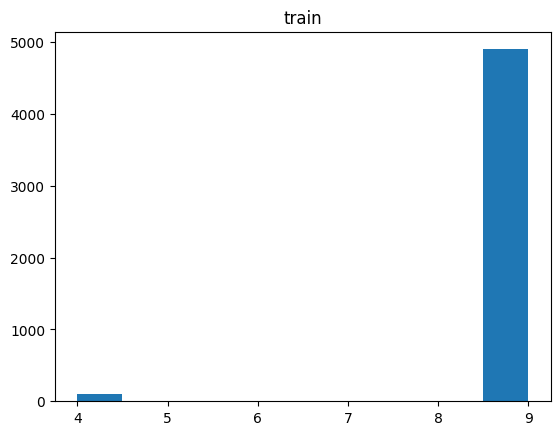

In [ ]:
from matplotlib import pyplot as plt
plt.figure()
plt.hist(y_train)
plt.title('train')

Text(0.5, 1.0, 'test')

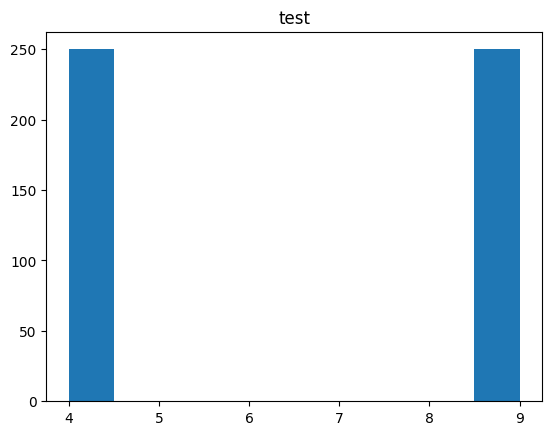

In [ ]:
from matplotlib import pyplot as plt
plt.figure()
plt.hist(y_test)
plt.title('test')

4. sample minibatch function

In [ ]:
np.bincount(y_train)[4]

500

In [ ]:
# sample minibatch
def SampleMiniBatch(data, pos_ratio=0.9,batch_size=100):
  x_train, y_train=data
  ratio = 1 - pos_ratio
  # calculate ntrain_class_0 and ntrain_class_1 in train set:
  ntrain_class_0 = int(np.ceil(ratio*batch_size))
  ntrain_class_1 = int(np.ceil(pos_ratio*batch_size))
  train_idx_0 = np.where((y_train == 4))[0]
  train_idx_1 = np.where((y_train == 9))[0]
  # select minibatch train data
  idx_train_0 = np.random.choice(train_idx_0, ntrain_class_0, replace=False)
  idx_train_1 = np.random.choice(train_idx_1, ntrain_class_1, replace=False)
  idx_train = np.concatenate((idx_train_0, idx_train_1))
  return [x_train[idx_train], y_train[idx_train]]

In [ ]:
data=(x_train, y_train)
x_mini, y_mini = SampleMiniBatch(data)

In [ ]:
print("x_mini shape:", x_mini.shape)
print(x_mini.shape[0], "mini samples")
x_mini[y_mini==4].shape

x_mini shape: (100, 28, 28, 1)
100 mini samples


(10, 28, 28, 1)

5. run origin model

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu',use_bias=False),
    tf.keras.layers.Dense(2,activation='sigmoid')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50176     
                                                                 
 dense_10 (Dense)            (None, 2)                 130       
                                                                 
Total params: 50,306
Trainable params: 50,306
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu',use_bias=False),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Define the loss function
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Define optimizer
optimizer_SGD=tf.keras.optimizers.SGD(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer_SGD, loss=loss_fn, metrics=['accuracy'])

# Train the model
model.fit(x_mini, y_mini==9)

# Evaluate the model
model.evaluate(x_test, y_test==9)


63/63 [==============================] - 1s 5ms/step - loss: 0.7201 - accuracy: 0.5279


[0.7201403975486755, 0.5278754234313965]

6. get 1/nclass weight

In [ ]:
def reweight_class(y_train, batch_size=100, ratio=0.9):
  ntrain_class_0 = int(np.ceil((1-ratio)*batch_size))
  ntrain_class_1 = int(np.ceil(ratio*batch_size))
  train_idx_0 = np.where((y_train == 4))[0]
  train_idx_1 = np.where((y_train == 9))[0]
  sample_weight = np.ones(batch_size,)
  sample_weight[train_idx_0] = 1/ntrain_class_0
  sample_weight[train_idx_1] = 1/ntrain_class_1
  sample_weight=sample_weight/np.sum(sample_weight)
  return sample_weight

In [ ]:
weight_inverse_frequency=reweight_class(y_mini, batch_size=100, ratio=0.9)

try weight by class

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu',use_bias=False),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Define the loss function
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Define optimizer
optimizer_SGD=tf.keras.optimizers.SGD(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer_SGD, loss=loss_fn, metrics=['accuracy'])

# Train the model
model.fit(x_mini, y_mini==9,sample_weight=weight_inverse_frequency)

# Evaluate the model
model.evaluate(x_test, y_test==9)


16/16 [==============================] - 0s 2ms/step - loss: 0.7278 - accuracy: 0.4460


[0.7277728319168091, 0.44600000977516174]

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu',use_bias=False),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Define the loss function
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Define optimizer
optimizer_SGD=tf.keras.optimizers.SGD(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer_SGD, loss=loss_fn, metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train==9,class_weight={0:0.9,1:0.1},batch_size=100,epochs=10)

# Evaluate the model
model.evaluate(x_test, y_test==9)

Epoch 1/10
50/50 [==============================] - 1s 4ms/step - loss: 0.1205 - accuracy: 0.4108
Epoch 2/10
50/50 [==============================] - 0s 3ms/step - loss: 0.1144 - accuracy: 0.6710
Epoch 3/10
50/50 [==============================] - 0s 4ms/step - loss: 0.1095 - accuracy: 0.7668
Epoch 4/10
50/50 [==============================] - 0s 3ms/step - loss: 0.1050 - accuracy: 0.8240
Epoch 5/10
50/50 [==============================] - 0s 4ms/step - loss: 0.1008 - accuracy: 0.8512
Epoch 6/10
50/50 [==============================] - 0s 4ms/step - loss: 0.0969 - accuracy: 0.8766
Epoch 7/10
50/50 [==============================] - 0s 3ms/step - loss: 0.0931 - accuracy: 0.8858
Epoch 8/10
50/50 [==============================] - 0s 4ms/step - loss: 0.0896 - accuracy: 0.8980
Epoch 9/10
50/50 [==============================] - 0s 4ms/step - loss: 0.0862 - accuracy: 0.9050
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.9000


[0.4517274498939514, 0.8999999761581421]

 7.random weight

In [ ]:
def reweight_random(batch_size=100):
  sample_weight=np.random.normal(size=batch_size)
  sample_weight=np.maximum(sample_weight, 0)
  sample_weight=sample_weight/np.sum(sample_weight)
  return sample_weight

In [ ]:
weight_random=reweight_random(100)

try random weight

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu',use_bias=False),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Define the loss function
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Define optimizer
optimizer_SGD=tf.keras.optimizers.SGD(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer_SGD, loss=loss_fn, metrics=['accuracy'])

# Train the model
model.fit(x_mini, y_mini==9,sample_weight=weight_random)

# Evaluate the model
model.evaluate(x_test, y_test==9)


63/63 [==============================] - 0s 2ms/step - loss: 0.7296 - accuracy: 0.5093


[0.7295659184455872, 0.5092918276786804]

8. our method for weight

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28),name='flatten_layer'),
    tf.keras.layers.Dense(128, activation='relu', use_bias=False,name='dense_layer'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define the loss function
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)

# Compile the model with SGD optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=loss_fn, metrics=['accuracy'])

# Train the model
model.fit(x_mini, y_mini==9)

# Create a new model that outputs the output of the desired layer
intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                                 outputs=model.get_layer('flatten_layer').output)

# Get the output of the desired layer for a given input
z_train = intermediate_layer_model.predict(x_mini)
z_validation = intermediate_layer_model.predict(x_val)



1/1 [==============================] - 0s 33ms/step


In [ ]:
# Compute weights
print(z_train.shape)
print(z_validation.shape)
z_combine=tf.matmul(z_train,tf.transpose(z_validation))
z_combine.shape

(100, 784)
(10, 784)


TensorShape([100, 10])

In [ ]:
comparison_matrix = ((y_mini==9).astype(int).reshape((-1,1)) == tf.transpose((y_val==9).astype(int).reshape((-1,1))))
integer_matrix = tf.cast(comparison_matrix, dtype=tf.float32)
integer_matrix.shape

TensorShape([100, 10])

In [ ]:
weight_mat=tf.multiply(z_combine, integer_matrix)
weight_ours = tf.reduce_sum(weight_mat, axis=1, keepdims=True)
weight_ours=weight_ours/np.sum(weight_ours)
weight_ours.shape

TensorShape([100, 1])

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu',use_bias=False),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Define the loss function
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Define optimizer
optimizer_SGD=tf.keras.optimizers.SGD(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer_SGD, loss=loss_fn, metrics=['accuracy'])

# Train the model
model.fit(x_mini, y_mini==9,sample_weight=weight_ours)

# Evaluate the model
model.evaluate(x_test, y_test==9)

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 0s 3ms/step - loss: 0.7243 - accuracy: 0.4180


[0.7243064641952515, 0.4180000126361847]

---------------------------------------

9. try save and load parameter

baseline

In [ ]:
# set random seed
tf.random.set_seed(42)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu',use_bias=False),
    tf.keras.layers.Dense(1)
])
# Define the loss function
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Define optimizer
optimizer_SGD=tf.keras.optimizers.SGD(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer_SGD, loss=loss_fn, metrics=['accuracy'])

data=(x_train, y_train)

T=1000
for t in range(T):
  if (t!=0):
    model.load_weights('model_weights.h5')
    x_mini, y_mini = SampleMiniBatch(data)
  #x_mini, y_mini = SampleMiniBatch(data,pos_ratio=0.98)
  # Train the model
  model.fit(x_mini, y_mini==9)
  model.save_weights('model_weights.h5')

# Evaluate the model
model.evaluate(x_test, y_test==9)

63/63 [==============================] - 0s 3ms/step - loss: 0.2269 - accuracy: 0.9282


[0.22685697674751282, 0.9281768202781677]

In [ ]:
model.load_weights('model_weights.h5')
model.fit(x_train,y_train==9)
model.evaluate(x_test, y_test==9)

16/16 [==============================] - 0s 2ms/step - loss: 1.6601 - accuracy: 0.5000


[1.6601130962371826, 0.5]

our method

In [ ]:
# set random seed
tf.random.set_seed(42)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28),name='flatten_layer'),
    tf.keras.layers.Dense(128, activation='relu', use_bias=False,name='dense_layer'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define the loss function
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)

# Compile the model with SGD optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=loss_fn, metrics=['accuracy'])

# Define the model temp
model_temp = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28),name='flatten_layer'),
    tf.keras.layers.Dense(128, activation='relu', use_bias=False,name='dense_layer'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define the loss function
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)

# Compile the model with SGD optimizer
model_temp.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=loss_fn, metrics=['accuracy'])

data=(x_train, y_train)

T=1000
for t in range(T):
  x_mini, y_mini = SampleMiniBatch(data)
  #x_mini, y_mini = SampleMiniBatch(data,pos_ratio=0.98)
  if (t!=0):
    model_temp.load_weights('model_weights.h5')
  # Train the model
  model_temp.fit(x_mini, y_mini==9)
  # Create a new model that outputs the output of the desired layer
  intermediate_layer_model = tf.keras.models.Model(inputs=model_temp.input,
                                                 outputs=model_temp.get_layer('flatten_layer').output)
  # Get the output of the desired layer for a given input
  z_train = intermediate_layer_model.predict(x_mini)
  z_validation = intermediate_layer_model.predict(x_val)
  z_combine=tf.matmul(z_train,tf.transpose(z_validation))
  comparison_matrix = ((y_mini==9).astype(int).reshape((-1,1)) == tf.transpose((y_val==9).astype(int).reshape((-1,1))))
  integer_matrix = tf.cast(comparison_matrix, dtype=tf.float32)
  weight_mat=tf.multiply(z_combine, integer_matrix)
  weight_ours = tf.reduce_sum(weight_mat, axis=1, keepdims=True)
  weight_ours=weight_ours/np.sum(weight_ours)
  if (t!=0):
    model.load_weights('model_weights.h5')
  model.fit(x_mini, y_mini==9,sample_weight=weight_ours)
  model.save_weights('model_weights.h5')

# Evaluate the model
model.evaluate(x_test, y_test==9)



63/63 [==============================] - 0s 4ms/step - loss: 1.0186 - accuracy: 0.5068


[1.0185792446136475, 0.5067805051803589]

In [ ]:
model.load_weights('model_weights.h5')
model.fit(x_train,y_train==9)
model.evaluate(x_test, y_test==9)

63/63 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9442


[0.20892967283725739, 0.9442490935325623]

try weight by 1/fraquency

In [ ]:
# set random seed
tf.random.set_seed(42)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu',use_bias=False),
    tf.keras.layers.Dense(1)
])
# Define the loss function
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Define optimizer
optimizer_SGD=tf.keras.optimizers.SGD(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer_SGD, loss=loss_fn, metrics=['accuracy'])

data=(x_train, y_train)

T=10
for t in range(T):
  if (t!=0):
    model.load_weights('model_weights.h5')
  x_mini, y_mini = SampleMiniBatch(data)
  #x_mini, y_mini = SampleMiniBatch(data,pos_ratio=0.98)
  weight_inverse_frequency=reweight_class(y_mini, batch_size=100, ratio=0.90)
  #weight_inverse_frequency=reweight_class(y_mini, batch_size=101, ratio=0.98)
  # Train the model
  model.fit(x_mini, y_mini==9,sample_weight=weight_inverse_frequency)
  model.save_weights('model_weights.h5')

# Evaluate the model
model.evaluate(x_test, y_test==9)

63/63 [==============================] - 0s 3ms/step - loss: 0.5953 - accuracy: 0.7514


[0.595283567905426, 0.7513812184333801]

In [ ]:
# Evaluate the model
model.load_weights('model_weights.h5')
model.fit(x_train,y_train==9)
model.evaluate(x_test, y_test==9)

63/63 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9422


[0.20446763932704926, 0.9422400593757629]

In [ ]:
import numpy as np
accuracy=np.zeros((3,3))
accuracy[0,0]=0.9281768202781677
accuracy[1,0]=0.9413812184333801
accuracy[2,0]=0.9667805051803589
accuracy[0,1]=0.8968569767475128
accuracy[1,1]=0.9346763932704926
accuracy[2,1]=0.9585792446136475
accuracy[0,2]=0.8357609510421753
accuracy[1,2]=0.9006027340888977
accuracy[2,2]=0.9442490935325623


test_error=1-accuracy

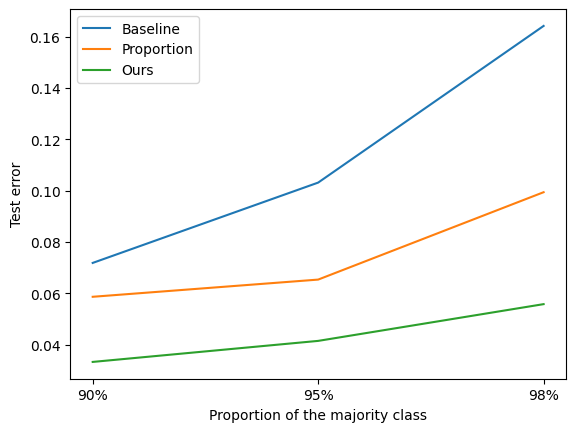

In [ ]:
import matplotlib.pyplot as plt

# plot your data as usual
x = [1, 2, 3]
y1 = test_error[0,:]
y2 = test_error[1,:]
y3 = test_error[2,:]
plt.plot(x, y1, label='Baseline')
plt.plot(x, y2, label='Proportion')
plt.plot(x, y3, label='Ours')

# set x-axis labels to desired values
plt.xticks(x, ['90%', '95%', '98%'])

# add legend and axis labels
plt.legend()
plt.xlabel('Proportion of the majority class')
plt.ylabel('Test error')
plt.show()